In [1]:
# 라이브러리
import pandas as pd
import matplotlib as mpl # 그래프 옵션(글꼴)
import matplotlib.pyplot as plt #그래프 옵션(그래프축/범례/제목)
import seaborn as sns # 시각화
import numpy as np
import scipy.stats as stats

# 기타 설정
plt.rc('font',family='Malgun Gothic') # 한글 글꼴 설정
pd.set_option('display.max_columns', None)

### 취약지역 불러오기 및 전처리(완료)

In [4]:
df_2024 = pd.read_csv('경상북도 산사태취약지역 지정 현황_2024.csv', encoding='cp949')
df_2025 = pd.read_csv('경상북도_산사태취약지역지정현황_20250506.csv', encoding='cp949')

In [6]:
df_2024.head(1)

연번    시도  시군구 읍면동     리        지번  (위도)도  (위도)분   (위도)초  (경도)도  (경도)분  \
0   1  경상북도  포항시  남구  구룡포읍  산109-11임     35     59  49.927    129     32   

    (경도)초 취약지역유형  지정면적(제곱미터)     데이터기준일자  
0  46.592    토석류      2887.0  2023-12-31

In [8]:
df_2025.head(1)

연번    시도  시군구  읍면동    리     지번  (위도)도  (위도)분  (위도)초  (경도)도  (경도)분   (경도)초  \
0   1  경상북도  경산시  와촌면  대한리  산132구     35     59  1.998    128     44  54.041   

  취약지역유형  지정면적(제곱미터)     데이터기준일자  
0    토석류       417.0  2025-05-06

### 산불 영향 top 5
- 의성, 안동, 청송, 영양, 영덕
- 각 시/군의 2024년 산사태취약지형 개수 -> 2025년 산사태취약지형 개수 변화 확인

In [44]:
sum(df_2024['시군구'].isin(['의성군'])), sum(df_2025['시군구'].isin(['의성군']))

(280, 280)

In [48]:
sum(df_2024['시군구'].isin(['안동시'])), sum(df_2025['시군구'].isin(['안동시']))

(355, 408)

In [50]:
sum(df_2024['시군구'].isin(['청송군'])), sum(df_2025['시군구'].isin(['청송군']))

(214, 294)

In [52]:
sum(df_2024['시군구'].isin(['영양군'])), sum(df_2025['시군구'].isin(['영양군']))

(231, 282)

In [54]:
sum(df_2024['시군구'].isin(['영덕군'])), sum(df_2025['시군구'].isin(['영덕군']))

(243, 293)

- 의성군 제외 **안동시, 청송군, 영양군, 영덕군** 변화 유의미
- 산사태 취약 지형의 취약점수(취약함 정도/등급) 확인은 불가능 -> 정보공개청구

### 2024 -> 2025 취약지역 수 증가는 산불이 원인?
- 지정면적 크기변화 확인
- 산불 피해지 주변 신규 취약지형 지정 or 기존 취약지형 지정면적 확대

In [203]:
# 지정면적 합계 확인
(df_2024['지정면적(제곱미터)'].sum(), df_2025['지정면적(제곱미터)'].sum())

(77996235.362, 20520044.0)

**취약지역 수는 늘었는데 면적은 줄었다?**

In [137]:
# 의성군 지정면적
cond_2024 = df_2024['시군구'].isin(['의성군'])
cond_2025 = df_2025['시군구'].isin(['의성군'])
df_2024.loc[cond_2024, '지정면적(제곱미터)'].sum(), df_2025.loc[cond_2025, '지정면적(제곱미터)'].sum()

(17841861.891999997, 419151.0)

In [141]:
# 안동시 지정면적
cond_2024 = df_2024['시군구'].isin(['안동시'])
cond_2025 = df_2025['시군구'].isin(['안동시'])
df_2024.loc[cond_2024, '지정면적(제곱미터)'].sum(), df_2025.loc[cond_2025, '지정면적(제곱미터)'].sum()

(366473.07, 717220.0)

In [143]:
# 청송군 지정면적
cond_2024 = df_2024['시군구'].isin(['청송군'])
cond_2025 = df_2025['시군구'].isin(['청송군'])
df_2024.loc[cond_2024, '지정면적(제곱미터)'].sum(), df_2025.loc[cond_2025, '지정면적(제곱미터)'].sum()

(430300.92999999993, 412783.0)

In [145]:
# 영양군 지정면적
cond_2024 = df_2024['시군구'].isin(['영양군'])
cond_2025 = df_2025['시군구'].isin(['영양군'])
df_2024.loc[cond_2024, '지정면적(제곱미터)'].sum(), df_2025.loc[cond_2025, '지정면적(제곱미터)'].sum()

(3525394.25, 542363.0)

In [147]:
# 영덕군 지정면적
cond_2024 = df_2024['시군구'].isin(['영덕군'])
cond_2025 = df_2025['시군구'].isin(['영덕군'])
df_2024.loc[cond_2024, '지정면적(제곱미터)'].sum(), df_2025.loc[cond_2025, '지정면적(제곱미터)'].sum()

(11551332.59, 3108801.0)

**안동시 제외 지정면적 축소??** -> **why?**

- 우선 취약지역 변동 알아보기

In [227]:
df_2024['리'] = df_2024['리'].fillna("")
df_2025['리'] = df_2025['리'].fillna("")
df_2024['지번'] = df_2024['지번'].fillna("")
df_2025['지번'] = df_2025['지번'].fillna("")

In [6]:
# 주소지 통합처리
df_2025['리'] = df_2025['리'].fillna('')
df_2024['리'] = df_2024['리'].fillna('')
df_2025['addr'] = df_2025['시군구'] + ' ' + df_2025['읍면동'] + ' ' +df_2025['리'] + ' ' +df_2025['지번']
df_2024['addr'] = df_2024['시군구'] + ' ' + df_2024['읍면동'] + ' ' +df_2024['리'] + ' ' +df_2024['지번']
df_2025.loc[df_2025['리']=='','addr']

36            경산시 점촌동  산37임
61           경산시 사정동  산2-1임
88             경산시 사정동  산7임
107         경산시 사정동  314-4구
113        경산시 백천동  146-12임
               ...         
6232      포항시 북구 학산동  산53-1
6239    포항시 북구 우현동  산129-1임
6246    포항시 북구 우현동  산30-10임
6247     포항시 북구 우현동  산83-1임
6268    포항시 북구 용흥동  산108-2임
Name: addr, Length: 286, dtype: object

In [201]:
# 2024년엔 없고 2025년엔 있는 취약지역 알아보기
len(df_2024), len(df_2025)

(5396, 6275)

In [259]:
df_diff = df_2025.loc[~df_2025['adress'].isin(df_2024['adress']),]
df_diff.reset_index(inplace=True)

In [277]:
df_diff.loc[df_diff['시군구'] == '의성군','adress']

768          의성군 사곡면 매곡리 산25-5구
769            의성군 의성읍 상리리 산8-1
770           의성군 안평면 석탑리 산122임
771      의성군 안평면 신안리 산82임(산32임)
772     의성군 안평면 대사리 산139임 외 3필지
773     의성군 안평면 삼춘리 산62임(1097구)
774            의성군 안평면 삼춘리 355전
775    의성군 비안면 자락리 산65-2임 외 2필지
776      의성군 단촌면 구계리 산46임 외 3필지
Name: adress, dtype: object

In [281]:
df_diff['지정면적(제곱미터)'].sum()

1882137.0

### df_2025 좌표 이상 발견 -> 수정

In [41]:
# 변환 함수
def dms_to_decimal(degree, minute, second):
    try:
        return float(degree) + float(minute) / 60 + float(second) / 3600
    except (ValueError, TypeError):
        return None

# 적용
df_vul_2025 = df_2025.copy()
df_vul_2025['위도(변환)'] = df_vul_2025.apply(lambda row: dms_to_decimal(row['(위도)도'], row['(위도)분'], row['(위도)초']), axis=1)
df_vul_2025['경도(변환)'] = df_vul_2025.apply(lambda row: dms_to_decimal(row['(경도)도'], row['(경도)분'], row['(경도)초']), axis=1)
df_vul_2025.head(1)

연번    시도  시군구  읍면동    리     지번  (위도)도  (위도)분  (위도)초  (경도)도  (경도)분   (경도)초  \
0   1  경상북도  경산시  와촌면  대한리  산132구     35     59  1.998    128     44  54.041   

  취약지역유형  지정면적(제곱미터)     데이터기준일자     위도(변환)      경도(변환)  
0    토석류       417.0  2025-05-06  35.983888  128.748345

### 본격적 GIS 분석

In [52]:
# # googlemap api로 주소->위경도 변환 후 비교
# import googlemaps
# import time

# # Google Maps API 키 설정
# gmaps = googlemaps.Client(key='')

# # 좌표 저장용 컬럼 추가
# df_vul_2025['위도_geo'] = None
# df_vul_2025['경도_geo'] = None

# # 주소 → 위경도 변환
# for idx, row in df_vul_2025.iterrows():
#     address = row['addr']
#     try:
#         geocode_result = gmaps.geocode(address)
#         if geocode_result:
#             location = geocode_result[0]['geometry']['location']
#             df_vul_2025.at[idx, '위도_geo'] = location['lat']
#             df_vul_2025.at[idx, '경도_geo'] = location['lng']
#         else:
#             print(f"[경고] 주소를 찾을 수 없음: {address}")
#     except Exception as e:
#         print(f"[에러] {address} 변환 실패: {e}")
df_vul_2025 = pd.read_csv('산사태취약지역_2025_EA6275.csv').iloc[:,1:]

In [66]:
# 위/경도_geo 오류수정

ls_error = [5773, 5878]
for val_error in ls_error:
    df_vul_2025.loc[val_error,'위도_geo'] = df_vul_2025.loc[val_error,'위도(변환)']
    df_vul_2025.loc[val_error,'경도_geo'] = df_vul_2025.loc[val_error,'경도(변환)']

In [19]:
# 각 id별 첫 번째 행만 남기고 중복 제거
df_sltr = pd.read_csv('산사태_대피소_경북_2248EA.csv', encoding='cp949')
df_sltr = df_sltr.drop_duplicates(subset=['id'], keep='first').reset_index(drop=True)
df_sltr['sgg'] = df_sltr['addr'].apply(lambda x: x.split(' ')[1])
df_sltr.head(1)

id        name               org           tel  \
0  20617  두산2리 새마을회관  남부지방산림청 영주국유림관리소  054-630-4062   

                       addr        lat         lon  
0  경상북도 영주시 봉현면 두산리 313-1 과  36.868031  128.496102

In [23]:
import folium
import geopandas as gpd
from folium.plugins import MiniMap
from folium.plugins import MarkerCluster
import math

In [31]:
df_sgg = gpd.read_file("shp_files/map_sgg.shp", encoding = "cp949")
df_gn  = df_sgg.loc[df_sgg["SIG_CD"].str.contains("^47")]
df_gn = df_gn.set_crs(epsg=5179) # EPSG 좌표계는 주로 EPSG:5179(UTM-K)

# 초기 지도 생성 (경상북도 중심좌표)
m = folium.Map(location=[36.4919, 128.8889], zoom_start=9, tiles="cartodbpositron")

# 시군구 경계 레이어 추가
folium.GeoJson(
    df_gn,
    name='경상북도 시군구 경계',
    style_function=lambda x: {'fillColor': 'gray', 'color': 'black', 'weight': 1, 'fillOpacity': 0.1}
).add_to(m)

In [33]:
for idx, row in df_sltr.iterrows():    
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=1,
        color='green',
        fill=True,
        fill_opacity=0.1,
        #icon=folium.Icon(icon='home', color='green'),
        popup=folium.Popup(f"{row['id']}, {row['name']}", parse_html=True)
    ).add_to(m)

In [68]:
# 산사태 취약지역 마커(gps) 추가
for idx, row in df_vul_2025.iterrows():
    area = row['지정면적(제곱미터)']
    if pd.notnull(area) and area > 0:
        radius = math.sqrt(area / math.pi)  # 면적 -> 반지름(m)
        folium.Circle(
            location=[row['위도_geo'], row['경도_geo']],
            radius=radius,
            color='red',
            fill=True,
            fill_opacity=0.1,
            popup=folium.Popup(
                f"{row['취약지역유형']}, {row['지번']}, {area:.0f}㎡", parse_html=True)
        ).add_to(m)

In [70]:
# 8) 레전드(간단 HTML 오버레이) + 레이어 컨트롤
legend_html = """
<div style="
 position: fixed; bottom: 20px; left: 20px; z-index: 9999;
 background: white; padding: 10px 12px; border:1px solid #ccc; border-radius:8px;
 font-size:12px; box-shadow:0 2px 6px rgba(0,0,0,0.2);">
<b>범례</b><br>
<span style="display:inline-block;width:10px;height:10px;background:#ef3b2c;border:1px solid #d7301f;border-radius:50%;margin-right:6px;"></span>
취약지역(단위: 제곱미터)<br>
<span style="display:inline-block;width:10px;height:10px;background:#3bef2c;border:1px solid #3bef2c;border-radius:50%;margin-right:6px;"></span>
대피소<br>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))
folium.LayerControl(collapsed=True).add_to(m)

### 문제점1. 대피소가 취약지역 내에 존재
- ++ 학교, 회관, 경로당 등 기존 건물 활용 100%, 산사태 피해로부터 먼 제대로 된 대피소X
### 문제점2. 대피소가 없는 취약지역 다수 존재
- **Geopandas로 가장 가까운 대피소 거리 계산하기**

In [75]:
from haversine import haversine, Unit

In [77]:
df_sltr.head(1)

id        name               org           tel  \
0  20617  두산2리 새마을회관  남부지방산림청 영주국유림관리소  054-630-4062   

                       addr        lat         lon  sgg  
0  경상북도 영주시 봉현면 두산리 313-1 과  36.868031  128.496102  영주시

In [ ]:
def find_nearest_shelter(row, shelters):
    # (위도, 경도) 튜플 생성
    vul_point = (row['위도_geo'], row['경도_geo'])
    min_dist = float('inf')
    nearest_shelter = None
    for idx, shelter in shelters.iterrows():
        shelter_point = (shelter['lat'], shelter['lon'])
        dist = haversine(vul_point, shelter_point, unit=Unit.KILOMETERS)
        if dist < min_dist:
            min_dist = dist
            nearest_shelter = shelter['id']  # shelter name
    return pd.Series([min_dist, nearest_shelter])

# 결과 저장: 가장 가까운 대피소와 거리
df_vul_2025[['가장가까운대피소_거리km', '가장가까운대피소명']] = df_vul_2025.apply(
    find_nearest_shelter, axis=1, shelters=df_sltr
)
df_vul_2025['가장가까운대피소명'] = df_vul_2025['가장가까운대피소명'].astype('int')
df_vul_2025 = df_vul_2025.rename(columns={'가장가까운대피소_거리km':'nearest_sltr(km)', '가장가까운대피소명':'id_nearest_sltr'})
df_vul_2025.head()

### 문제의 대피소 선별
- 대피소까지 1km 이상, 2km 이하

In [11]:
df_sltr_sub = df_sltr.copy()
df_sltr_sub = df_sltr_sub.rename(columns={'id':'id_nearest_sltr'})

In [13]:
df_vul_sltr = df_vul_2025.merge(df_sltr_sub, on='id_nearest_sltr')
df_vul_sltr.head(2)

연번    시도  시군구  읍면동    리     지번  (위도)도  (위도)분  (위도)초  (경도)도  (경도)분   (경도)초  \
0   1  경상북도  경산시  와촌면  대한리  산132구     35     59  1.998    128     44  54.041   
1   2  경상북도  경산시  와촌면  음양리  산128임     35     58  0.600    128     44  42.600   

  취약지역유형  지정면적(제곱미터)     데이터기준일자             addr_x     위도(변환)      경도(변환)  \
0    토석류       417.0  2025-05-06  경산시 와촌면 대한리 산132구  35.983888  128.748345   
1    토석류       863.0  2025-05-06  경산시 와촌면 음양리 산128임  35.966833  128.745167   

      위도_geo      경도_geo  nearest_sltr(km)  id_nearest_sltr   name       org  \
0  35.983858  128.748332          2.239629            14287  지경경로당  대구광역시 동구   
1  35.969648  128.745735          0.646958            14287  지경경로당  대구광역시 동구   

            tel                 addr_y        lat         lon  
0  053-662-4122  경상북도 경산시 와촌면 음양리 959창  35.964069  128.743696  
1  053-662-4122  경상북도 경산시 와촌면 음양리 959창  35.964069  128.743696

In [15]:
# 결측값 평균대치
df_vul_sltr.loc[(df_vul_sltr['지정면적(제곱미터)'] == 1),'지정면적(제곱미터)'] = df_vul_sltr['지정면적(제곱미터)'].mean()

In [17]:
cond_le1 = df_vul_sltr['nearest_sltr(km)'] < 0.05
cond_up2 = df_vul_sltr['nearest_sltr(km)'] > 6

df_vul_sltr_prbm = df_vul_sltr.loc[cond_le1, ]
df_vul_sltr_prbm

연번    시도  시군구  읍면동    리    지번  (위도)도  (위도)분  (위도)초  (경도)도  (경도)분  \
146    147  경상북도  경산시  남산면  사림리  산24임     35     45  16.00    128     49   
3147  3148  경상북도  안동시  남후면  고상리  산41임     36     30  53.91    128     36   
5412  5413  경상북도  청송군  부남면  대전리  402임     36     19  48.00    129      4   

       (경도)초 취약지역유형   지정면적(제곱미터)     데이터기준일자            addr_x     위도(변환)  \
146    8.700    산사태  2089.000000  2025-05-06  경산시 남산면 사림리 산24임  35.754444   
3147  57.399    산사태  1639.000000  2025-05-06  안동시 남후면 고상리 산41임  36.514975   
5412  12.000    토석류  3270.171474  2025-05-06  청송군 부남면 대전리 402임  36.330000   

          경도(변환)     위도_geo      경도_geo  nearest_sltr(km)  id_nearest_sltr  \
146   128.819083  35.754608  128.819491          0.027343            10886   
3147  128.615944  36.515361  128.616228          0.048895            17931   
5412  129.070000  36.328168  129.064944          0.036764            16193   

          name       org           tel                     addr_y        lat  \
146    사림리마을회관  경상북도 경산시  053-804-7592     경상북도 경산시 남산면 사림리  352대  35.754379   
3147    고상리경로당  경상북도 안동시  054-840-4335      경상북도 안동시 남후면 고상리 84 대  36.514938   
5412  대전3리마을회관  경상북도 청송군      870-6312  경상북도 청송군 부남면 대전리  403-1 대  36.328420   

             lon  
146   128.819380  
3147  128.616077  
5412  129.065210

In [105]:
import geopandas as gpd
import folium
df_sgg = gpd.read_file("C:/Users/choic/Desktop/Untitled Folder/DJAC/map_sgg.shp", encoding = "cp949")
df_gn  = df_sgg.loc[df_sgg["SIG_CD"].str.contains("^47")]
df_gn = df_gn.set_crs(epsg=5179) # EPSG 좌표계는 주로 EPSG:5179(UTM-K)

# 구글 지도 타일 설정
tiles="cartodbpositron"
#tiles = "http://mt0.google.com/vt/lyrs=s&hl=ko&x={x}&y={y}&z={z}"
# 속성 설정
#attr = "Google"
# 초기 지도 생성 (경상북도 중심좌표)
m = folium.Map(location=[36.4919, 128.8889], zoom_start=9, tiles=tiles)

# 시군구 경계 레이어 추가
folium.GeoJson(
    df_gn,
    name='경상북도 시군구 경계',
    style_function=lambda x: {'fillColor': 'gray', 'color': 'black', 'weight': 1, 'fillOpacity': 0.1}
).add_to(m)

In [107]:
# 산사태 대피소 마커 추가
for idx, row in df_vul_sltr_prbm.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        color='green',
        icon=folium.Icon(color="green", icon="home"),
        popup=folium.Popup(f"{row['name']}, {row['addr_y']}", parse_html=True)
    ).add_to(m)

In [120]:
import math
# 산사태 취약지역 마커(geo) 추가
for idx, row in df_vul_sltr_prbm.iterrows():
    try:
        area = row['지정면적(제곱미터)']
        if pd.notnull(area) and area > 0:
            radius = math.sqrt(area / math.pi)  # 면적 -> 반지름(m)
            folium.Circle(
                location=[row['위도_geo'], row['경도_geo']],
                radius=radius,
                color='red',
                fill=True,
                fill_opacity=0.1,
                popup=folium.Popup(
                    f"{row['취약지역유형']}, {row['addr_x']}, {area:.0f}㎡", parse_html=True
                )
            ).add_to(m)
            folium.PolyLine(
                locations=[
                    [row['위도_geo'], row['경도_geo']],
                    [row['lat'], row['lon']]
                ],
                color='yellow',
                weight=2,
                opacity=0.8
            ).add_to(m)
    except Exception as e:
        print(f"Error in row {idx}: {e}")

In [122]:
m

In [19]:
df1 = df_vul_sltr.groupby(['시군구'])['addr_x'].count().reset_index()
df_sltr_sub1 = df_sltr.copy()
df_sltr_sub_col = df_sltr_sub1['addr'].str.split(' ', expand=True)
df_sltr_sub_col.columns = ['시도','시군구','읍면동','리','지번1','지번2','지번3','지번4']
df_sltr_addr = pd.concat([df_sltr_sub1, df_sltr_sub_col], axis=1)
df_sltr_addr.head(3)
df2 = df_sltr_addr.groupby('시군구')['id'].count().reset_index().iloc[1:,].reset_index(drop=True)

In [57]:
# 읍면동
df3 = df_vul_sltr.groupby(['시군구','읍면동'])['addr_x'].count().reset_index()
df4 = df_sltr_addr.groupby('읍면동')['id'].count().reset_index()#.iloc[1:,].reset_index(drop=True)
df2_merged = df3.merge(df4, on='읍면동')
df2_merged.columns = ['시군구','읍면동','취약지역개수','대피소개수']
df2_merged['취약지역-대피소비율'] = round(df2_merged['대피소개수']/df2_merged['취약지역개수'], 3) * 100
df3_rank = df2_merged.sort_values(by='취약지역-대피소비율').head(5).reset_index(drop=True)

In [63]:
'''
# 피벗: 누적 막대그래프용
pivot = df3_rank.set_index('addr')[["취약지역개수", "대피소개수"]]

plt.figure(figsize=(8,5))
# 누적 막대그래프
bottom = None
for col in pivot.columns:
    sns.barplot(x=pivot.index, y=pivot[col], label=col)
    if bottom is None:
        bottom = pivot[col].values
    else:
        bottom += pivot[col].values

# 비율 텍스트 표시
for i, (idx, row) in enumerate(df3_rank.iterrows()):
    total = row["취약지역개수"] + row["대피소개수"]
    plt.text(i, total+1, f'{row["취약지역-대피소비율"]}', ha='center')


plt.ylabel("개수")
plt.xlabel("읍면동")
plt.legend(title="구분")
plt.title("취약지역 vs 대피소 개수 (비율 표시)")
plt.show()
'''
df3_rank.columns=['시군구','읍면동','취약지역 수','대피소 수','비율']
df3_rank

시군구    읍면동  취약지역 수  대피소 수    비율
0  성주군  금수강산면      52      2   3.8
1  성주군    가천면      51      4   7.8
2  영천시    자양면      55      6  10.9
3  경산시    남천면      67      8  11.9
4  영주시    상망동       8      1  12.5

In [99]:
# 시군구
df_merged = df1.merge(df2, on='시군구')
df_merged.columns = ['시군구','취약지역개수','대피소개수']
df_merged['취약지역-대피소비율'] = round(df_merged['대피소개수']/df_merged['취약지역개수'], 3) * 100
df_merged2 = df_merged.sort_values(by='취약지역-대피소비율', ascending=False)

Text(0.5, 0, '대피소비율(단위: %)')

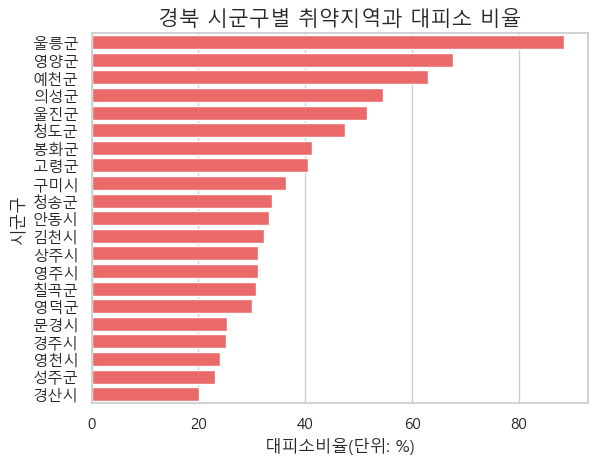

In [103]:
sns.barplot(df_merged2, y='시군구', x='취약지역-대피소비율', color='#FF5555')
plt.title('경북 시군구별 취약지역과 대피소 비율', fontsize=15)
plt.xlabel('대피소비율(단위: %)')

In [77]:
df_vul_sltr['소요시간(분)'] = df_vul_2025['소요시간(분)']

In [243]:
# 취약지구별 가장 가까운 대피소 주소
df_nrst = df_vul_sltr[['addr_x','취약지역유형','지정면적(제곱미터)','위도_geo','경도_geo','name','addr_y','nearest_sltr(km)','소요시간(분)','loc2','loc1']]
df_nrst.columns = ['취약지역주소','취약지역유형','지정면적(제곱미터)','취약지역위도','취약지역경도','대피소이름','대피소주소','대피소까지거리(km)','소요시간(분)','대피소위도','대피소경도']
df_nrst

KeyError: "['소요시간(분)', 'loc2', 'loc1'] not in index"

In [105]:
df_nrst = df_nrst.drop_duplicates().reset_index(drop=True)
df_nrst.head()

취약지역주소 취약지역유형  지정면적(제곱미터)     취약지역위도      취약지역경도     대피소이름  \
0   경산시 와촌면 대한리 산132구    토석류       417.0  35.983858  128.748332     지경경로당   
1   경산시 와촌면 음양리 산128임    토석류       863.0  35.969648  128.745735     지경경로당   
2    경산시 와촌면 대한리 산33임    토석류       500.0  35.985815  128.754740     지경경로당   
3   경산시 와촌면 음양리 산280구    토석류       471.0  35.965195  128.750309     지경경로당   
4  경산시 남천면 송백리 산15-2임    토석류       287.0  35.767059  128.760075  송백2리마을회관   

                    대피소주소  대피소까지거리(km)  소요시간(분)      대피소위도       대피소경도  
0   경상북도 경산시 와촌면 음양리 959창     2.239629       35  35.964069  128.743696  
1   경상북도 경산시 와촌면 음양리 959창     0.646958       10  35.964069  128.743696  
2   경상북도 경산시 와촌면 음양리 959창     2.614300       41  35.964069  128.743696  
3   경상북도 경산시 와촌면 음양리 959창     0.608231       10  35.964069  128.743696  
4  경상북도 경산시 남천면 송백리  510대     1.434379       23  35.755544  128.767240

In [255]:
df_final = pd.read_csv('취약지역과대피소_EA6275_최종.csv', encoding='cp949')
df_final2 = df_final[['취약지역주소','취약지역유형','지정면적(제곱미터)','대피소이름','대피소주소','대피소까지거리(km)','소요시간(분)']]
df_final2 = df_final2.rename(columns={'대피소이름':'가장가까운대피소'})
df_final2.to_csv('취약지역과대피소_업로드용.csv', encoding='cp949')

<Axes: ylabel='nearest_sltr(km)'>

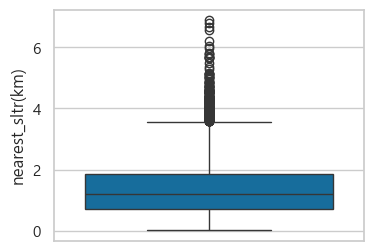

In [134]:
plt.figure(figsize=(4,3))
sns.boxplot(df_vul_2025, y='nearest_sltr(km)')

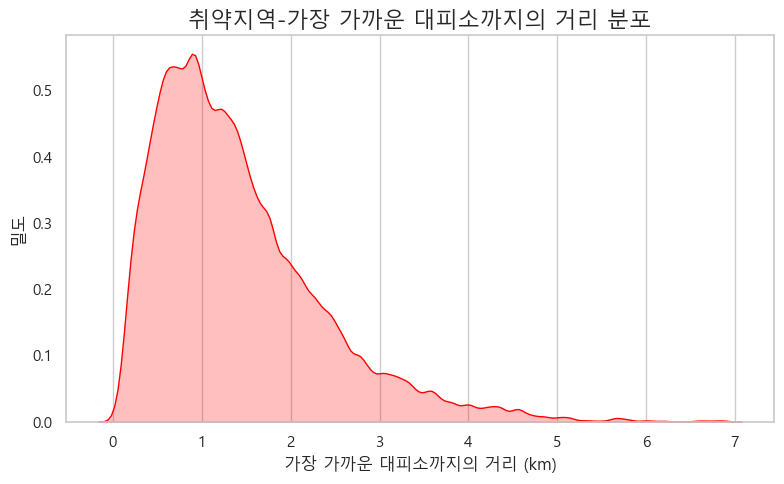

In [152]:
plt.figure(figsize=(8,5))
sns.kdeplot(df_vul_2025, x='nearest_sltr(km)', fill=True, bw_adjust=0.4, color='red')
plt.title('취약지역-가장 가까운 대피소까지의 거리 분포', fontsize=16)
plt.xlabel('가장 가까운 대피소까지의 거리 (km)')
plt.ylabel('밀도')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

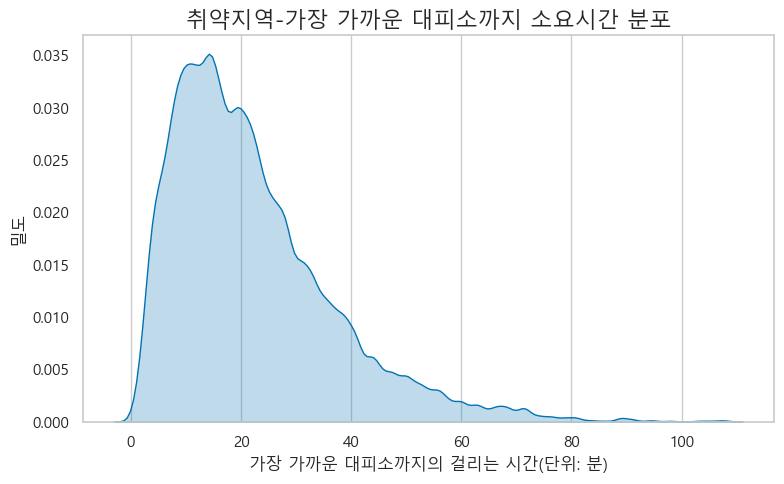

In [83]:
# 노인 보행 속도 1.06m/s로 소요시간 계산
def dist_to_time_str(distance_m):
    speed_mps = 1.06
    minutes = (distance_m*1000) / speed_mps / 60
    return round(minutes)  # 소수점 2자리까지 반환
df_vul_2025['소요시간(분)'] = df_vul_2025['nearest_sltr(km)'].apply(dist_to_time_str)

plt.figure(figsize=(8,5))
sns.kdeplot(data=df_vul_2025, x='소요시간(분)', fill=True, bw_adjust=0.4)
plt.title('취약지역-가장 가까운 대피소까지 소요시간 분포', fontsize=16)
plt.xlabel('가장 가까운 대피소까지의 걸리는 시간(단위: 분)')
plt.ylabel('밀도')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
df_vul_2025['']

In [355]:
df_vul_2025['nearest_sltr(km)'].describe()

count    6275.000000
mean        1.404076
std         0.938022
min         0.027343
25%         0.718324
50%         1.202122
75%         1.862173
max         6.881953
Name: nearest_sltr(km), dtype: float64

In [89]:
(df_vul_2025['소요시간(분)']>=60).sum()

166

In [357]:
df_vul_2025_meanofdist

시군구  nearest_sltr(km)
19     청송군          1.040092
0      경산시          1.015354
1      경주시          1.013077
7      상주시          0.999518
5      문경시          0.980399
..     ...               ...
22  포항시 북구          0.886900
16     울진군          0.836084
15     울릉군          0.835958
21  포항시 남구          0.829511
11     영양군          0.813712

[23 rows x 2 columns]

Text(0.5, 0, '가장 가까운 대피소까지의 거리 (단위: km)')

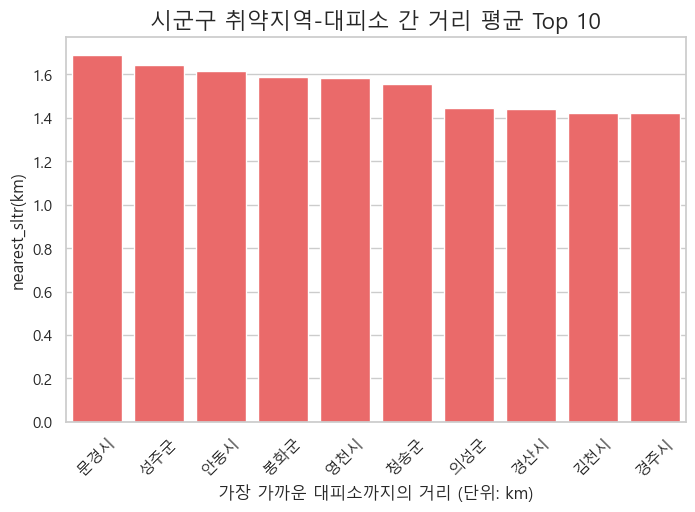

In [91]:
df_vul_2025_meanofdist = df_vul_sltr.groupby('시군구')['nearest_sltr(km)'].mean().reset_index().sort_values(by='nearest_sltr(km)', ascending=False).head(10)
ser_order = df_vul_2025_meanofdist['시군구']

plt.figure(figsize=(8,5))
sns.barplot(df_vul_2025_meanofdist, y='nearest_sltr(km)', x='시군구', color='#FF5555', order=ser_order, errorbar=None)
plt.xticks(rotation=45)
plt.title('시군구 취약지역-대피소 간 거리 평균 Top 10', fontsize=16)
plt.xlabel('가장 가까운 대피소까지의 거리 (단위: km)')

In [151]:
df_vul_2025_meanofdist

시군구  nearest_sltr(km)
5      문경시          1.687829
8      성주군          1.643893
9      안동시          1.616355
6      봉화군          1.588515
13     영천시          1.583094
..     ...               ...
18     청도군          1.175924
16     울진군          1.142330
21  포항시 남구          1.113391
11     영양군          1.076716
15     울릉군          0.835958

[23 rows x 2 columns]

In [65]:
df_vul_2025['시군구'].isin(['영덕군']).sum()

293

In [109]:
df_sltr_im = pd.read_csv('산사태_대피소_경북_2248EA.csv', encoding='cp949')
df_sltr_im = df_sltr_im.drop_duplicates().reset_index(drop=True)

In [117]:
df_sltr_cs = df_sltr_im.loc[df_sltr_im['addr'].str.contains('청송군'),].reset_index(drop=True)
df_sltr_cs.to_csv('산사태대피소_청송군_99EA.csv', index=False, encoding='cp949')

In [125]:
df_nrst_cs = df_nrst.loc[df_nrst['취약지역주소'].str.contains('청송군'),].reset_index(drop=True)
df_nrst_cs.to_csv('산사태취약지역_청송군_294EA.csv', index=False, encoding='cp949')

In [261]:
# Read CSV and export as a clean HTML table (UTF-8, no index, preserve columns/values)
import pandas as pd
from pathlib import Path

src = Path("취약지역과대피소_업로드용.csv")
out = Path("취약지역과대피소_업로드용.html")

# Load CSV robustly (try utf-8-sig first, then cp949)
read_errors = []
for enc in ["utf-8-sig", "utf-8", "cp949"]:
    try:
        df = pd.read_csv(src, dtype=str, encoding=enc).drop(columns='Unnamed: 0')
        break
    except Exception as e:
        read_errors.append(f"{enc}: {e}")
else:
    raise RuntimeError("CSV 읽기 실패: " + " | ".join(read_errors))

# Build minimal, upload-friendly HTML (no JS; sticky header; responsive)
table_html = df.to_html(index=False, escape=False)

html = f"""<!DOCTYPE html>
<html lang="ko">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>취약지역과대피소_업로드용 (Top5 + Scroll)</title>
  <style>
    :root {{ --border:#ddd; --bg:#ffffff; --alt:#fafafa; --head:#f5f5f5; }}
    html, body {{ margin:0; padding:0; background:var(--bg); }}
    body {{ font-family:system-ui, -apple-system, Segoe UI, Roboto, 'Noto Sans KR', Arial, sans-serif; font-size:14px; line-height:1.4; }}
    .wrap {{ max-width: 1200px; margin: 24px auto; padding: 0 12px; }}
    .table-scroll {{ position: relative; border:1px solid var(--border); border-radius:8px; overflow-y:auto; }}
    table {{ border-collapse: collapse; width: 100%; table-layout: auto; }}
    th, td {{ border-bottom:1px solid var(--border); padding:8px; vertical-align: top; white-space: nowrap; text-overflow: ellipsis; overflow: hidden; }}
    th {{ background: var(--head); position: sticky; top:0; z-index: 2; }}
    tr:nth-child(even) td {{ background: var(--alt); }}
  </style>
</head>
<body>
  <div class="wrap">
    <div id="tableScroll" class="table-scroll">
      {table_html}
    </div>
  </div>

  <script>
  // After DOM paints, set container height to header + first 5 body rows, then allow scroll for the rest.
  window.addEventListener('DOMContentLoaded', function() {{
      const sc = document.getElementById('tableScroll');
      const tbl = sc ? sc.querySelector('table') : null;
      if (!tbl) return;
      const thead = tbl.tHead;
      const tbody = tbl.tBodies && tbl.tBodies[0] ? tbl.tBodies[0] : null;
      if (!tbody) return;
      const rows = Array.from(tbody.rows);
      const n = Math.min(5, rows.length);
      let bodyH = 0;
      for (let i = 0; i < n; i++) {{
          bodyH += rows[i].getBoundingClientRect().height;
      }}
      const headH = thead ? thead.getBoundingClientRect().height : 0;
      // Add a tiny buffer for borders
      sc.style.height = Math.ceil(headH + bodyH + 2) + 'px';
  }});
  </script>
</body>
</html>
"""
out.write_text(html, encoding="utf-8")
out.as_posix()


'취약지역과대피소_업로드용.html'